<a href="https://colab.research.google.com/github/wolfworldrun/Data-Analysis-Visualization-Demo-Python-/blob/main/Astronomical_Tabular_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import os
import pandas as pd # explore csv file
import numpy as np  # create an array from the csv
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization


In [ ]:
# Read csv data and create a panda data frame
star_dataframe =  pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

In [ ]:
# Display data for personal reference
star_dataframe

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
# Create a directory to save the visualization
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'/content/{folder_name}/'

# Visualize the count of stars for each type of stat

### Matplotlib

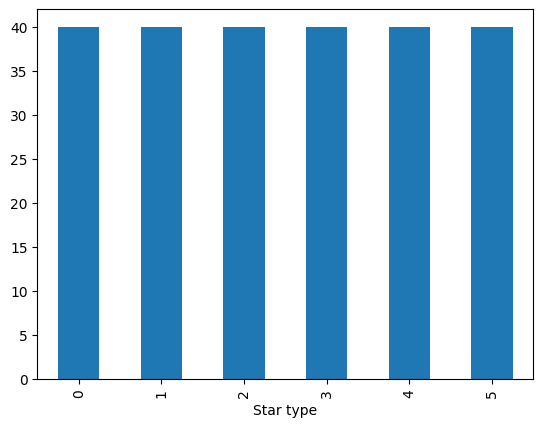

In [ ]:
# Bar chart to visualisze the count of stars with respective type

star_dataframe['Star type'].value_counts().plot(kind='bar')
plt.show()

# Customize above plot

## Adjust size of the figure
###  plt.figure(figsize=(5,5))

##Add value count on top of bars
### .bar_label(ax.containers[0], color='purple')

## Adjust background
### plt.style.use('inset bg')

## Save the file plot as an img
### plt.savefig(insert path + file name)

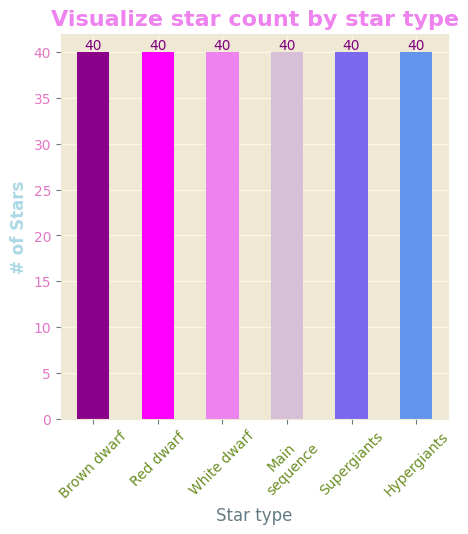

In [ ]:
#Customize plot
plt.figure(figsize=(5,5))
plt.style.use('Solarize_Light2')
ax = star_dataframe['Star type'].value_counts().plot(kind='bar', color=['darkmagenta', 'fuchsia', 'violet','thistle','mediumslateblue', 'cornflowerblue'])
ax.bar_label(ax.containers[0], color='purple')
plt.title('Visualize star count by star type', color='violet', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='lightblue', fontsize=12, weight='bold')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Brown dwarf','Red dwarf', 'White dwarf', 'Main\nsequence', 'Supergiants', 'Hypergiants'],
                                        rotation=45, color='olivedrab')
plt.savefig(base_dir+'star_plot.png')
plt.show()

# Bar Graph using Seaborn

/tmp/ipython-input-2775862606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_dataframe["Star color"].value_counts().index,


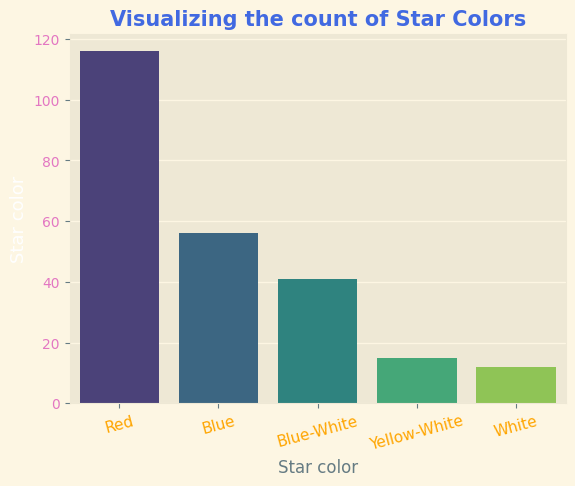

In [ ]:
# Visualising the Star color data

sns.barplot(x=star_dataframe["Star color"].value_counts().index,
            y=star_dataframe['Star color'].value_counts(), palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color', color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_vizualization.png')
plt.show()



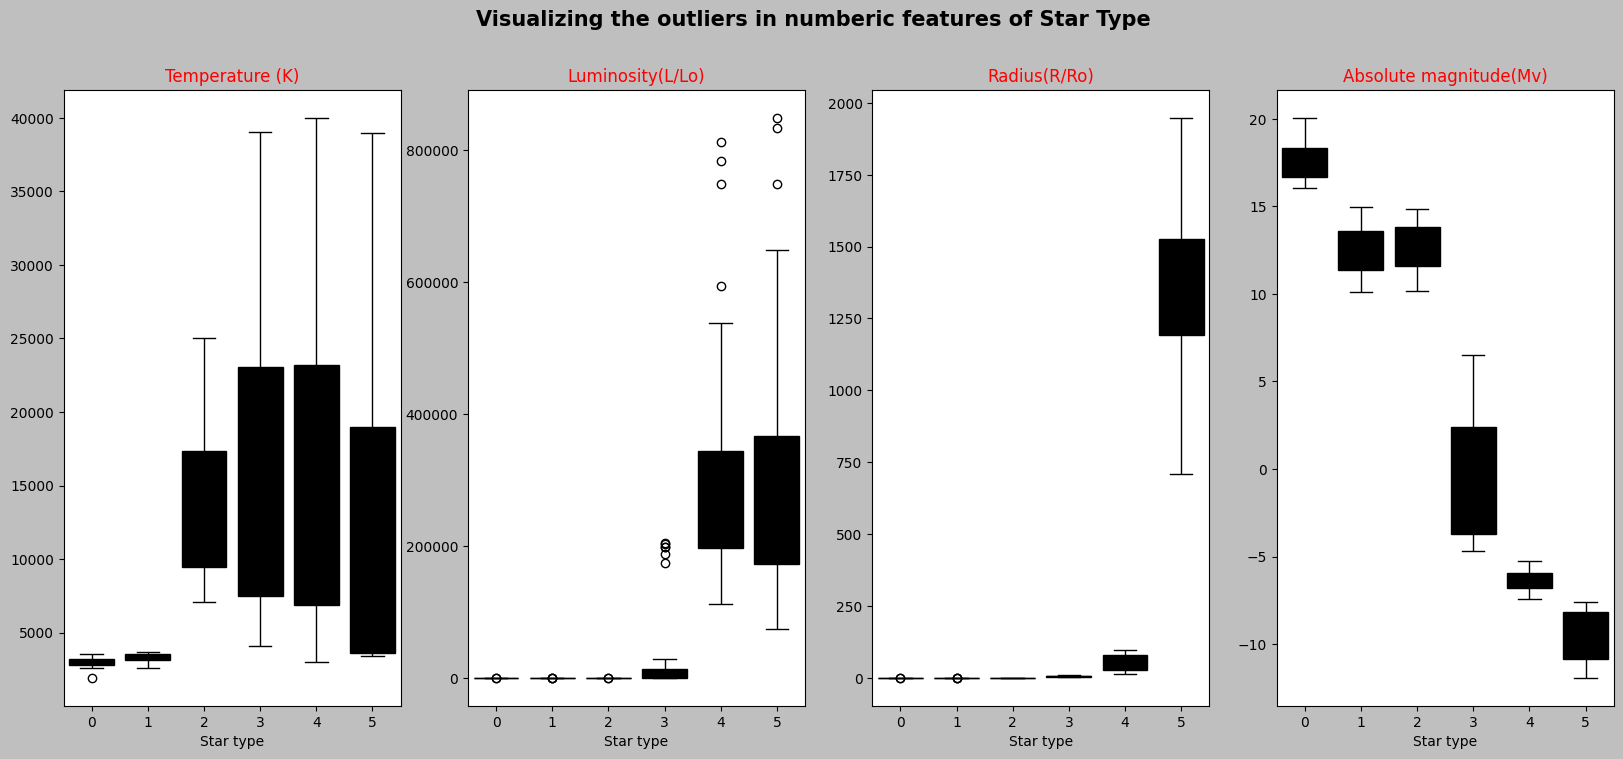

In [ ]:
# Visualiza Outliers in the data
plt.figure(figsize=(20,8))
plt.style.use('grayscale')
plt.suptitle('Visualizing the outliers in numberic features of Star Type', color='black', weight='bold', fontsize=15)

for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_dataframe['Star type'], y=star_dataframe.iloc[:,i])
  plt.title(star_dataframe.columns[i], color='red')
  plt.ylabel('')

plt.savefig(base_dir+'boxplot_star_type.png')
plt.show()